In [2]:
import numpy as np
from scipy import sparse

In [7]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis=0).T
X = np.concatenate((np.ones((1, 3*N)), X), axis=0)
C = 3
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

def softmax(Z):
    """
    Compute softmax values for each sets of scores in V.
    each column of V is a set of score
    """
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis=0)
    return A

def convert_labels(y, C = C):
    """
    convert 1d label to a matrix label: each column of this matrix coresponding
    to 1 element in y. In i-th column of Y, only one non-zeros element located in
    the y[i]-th position, and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return
            [[1, 0, 0, 1],
             [0, 0, 1, 0],
             [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape=(C, len(y))).toarray()
    return Y

def softmax_regression(X, y, w_init, eta, tol=1e-4, max_count=10000):
    w = [w_init]
    C = w_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    
    count = 0
    check_w_after = 20
    while count < max_count:
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*xi.dot((yi - ai).T)
            count += 1
            
            if count%check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [16]:
eta = .05
w_init = np.random.randn(X.shape[0], C)
w = softmax_regression(X, original_label, w_init, eta)
print(w[-1])

[[ 8.01892635 -4.00594421 -3.98475785]
 [-1.56880813  1.38252096 -1.14229702]
 [-0.26668747 -0.17141031  2.46666886]]


In [17]:
def softmax_stable(Z):
    e_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    A = e_Z / e_Z.sum(axis=0)
    return A

def pred(W, X):
    """
    Predict output of each column of X
    Class off each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ..., C-1]
    """
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis=0)

In [51]:
import matplotlib.pyplot as plt

x_min, x_max = X[1, :].min() - .5, X[1, :].max() + .5
y_min, y_max = X[2, :].min() - .5, X[2, :].max() + .5
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = pred(w[-1], np.concatenate((np.ones((1, xx.size)), np.c_[xx.ravel(), yy.ravel()].T), axis=0))

# print(np.ones((1, xx.size)).shape)
# print(xx.ravel().reshape(1, xx.size).shape)
# print(yy.ravel().reshape(1, yy.size).shape)
# print(np.concatenate((np.ones((1, xx.size)), xx.ravel().reshape(1, xx.size), yy.ravel().reshape(1, yy.size)), axis=0))
# print(np.concatenate((np.ones((1, xx.size)), np.c_[xx.ravel(), yy.ravel()].T), axis=0))

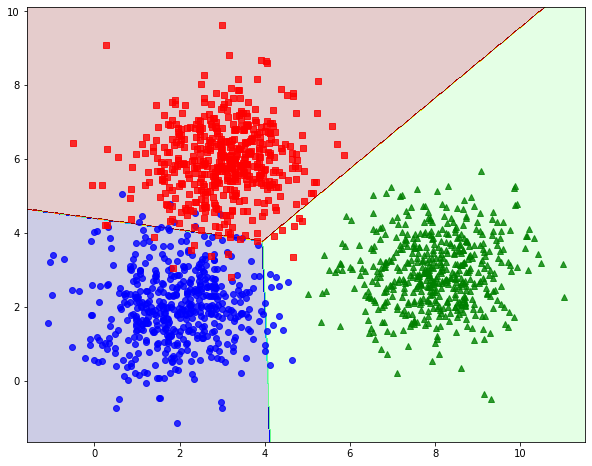

In [56]:
z = z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, z, 200, cmap='jet', alpha=.2)
plt.plot(X0[:, 0], X0[:, 1], 'bo', markersize=6, alpha=.8)
plt.plot(X1[:, 0], X1[:, 1], 'g^', markersize=6, alpha=.8)
plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize=6, alpha=.8)
plt.show()

In [57]:
# Use Softmax from sklearn library
from sklearn.linear_model import LogisticRegression

LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')